# my_mesh example script
Example script which illustrates how to to the following:
- Import a wavefront (.obj) mesh
- Translate the mesh
- Cut the mesh at z = 0
- Calculate volumetric propertiesof the mesh
- Export the modified mesh as a wavefront (.obj) file

In [1]:
# © 2023, NTNU
# Author: John Martin Kleven Godø <john.martin.godo@ntnu.no>
# This code is licenced under the GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import fastships_open.mesh_tools.mesh as mesh

## Specify input and output

In [2]:
test_obj_file                   = './Example_meshes/generic_fast_ferry_test_mesh.obj'
export_path                     = './Example_meshes/generic_fast_ferry_test_mesh_chopped.obj'

## Import and clean up mesh

In [3]:
fast_ferry_mesh                 = mesh.Mesh()
fast_ferry_mesh.import_from_obj(test_obj_file)

## Plot mesh

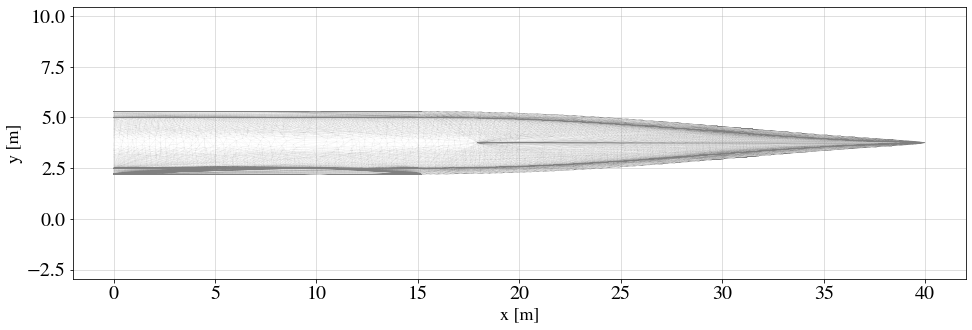

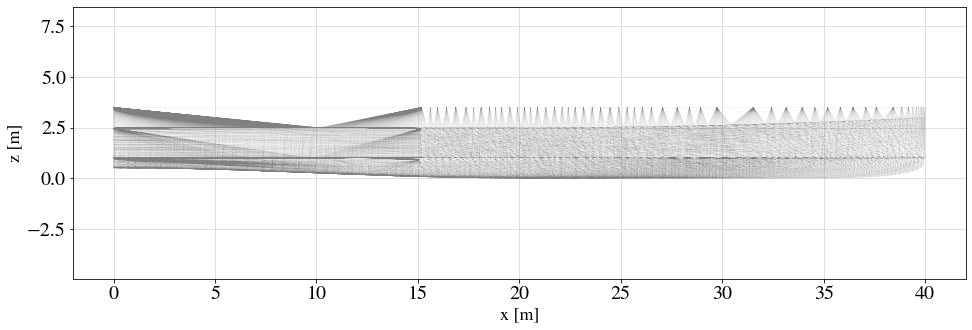

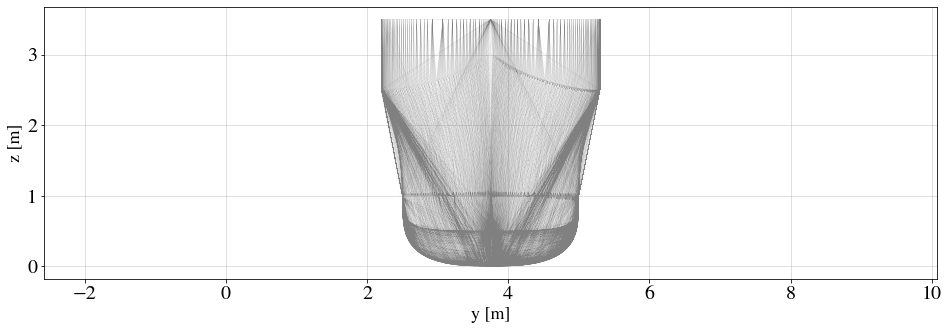

In [4]:
figure_size                     = (16, 5)
plot_color                      = 'gray'
line_width                      = 0.025
font_size                       = 18
label_font_size                 = 18
ticks_font_size                 = 20
legend_font_size                = 16


fig, ax = plt.subplots(1, 1, figsize = figure_size)
ax.plot(fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 0], fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 1], color = plot_color, linewidth = line_width)
ax.axis('equal')
ax.set_xlabel('x [m]', fontsize = label_font_size)
ax.set_ylabel('y [m]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)

fig, ax = plt.subplots(1, 1, figsize = figure_size)
ax.plot(fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 0], fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 2], color = plot_color, linewidth = line_width)
ax.axis('equal')
ax.set_xlabel('x [m]', fontsize = label_font_size)
ax.set_ylabel('z [m]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)

fig, ax = plt.subplots(1, 1, figsize = figure_size)
ax.plot(fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 1], fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 2], color = plot_color, linewidth = line_width)
ax.axis('equal')
ax.set_xlabel('y [m]', fontsize = label_font_size)
ax.set_ylabel('z [m]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)

## Translate mesh and cut it at z = 0

In [5]:
translate_vec                   = np.array((0, 0, -1))

fast_ferry_mesh.translate(translate_vec)
fast_ferry_mesh.chop_at_z0()

## Plot modified mesh

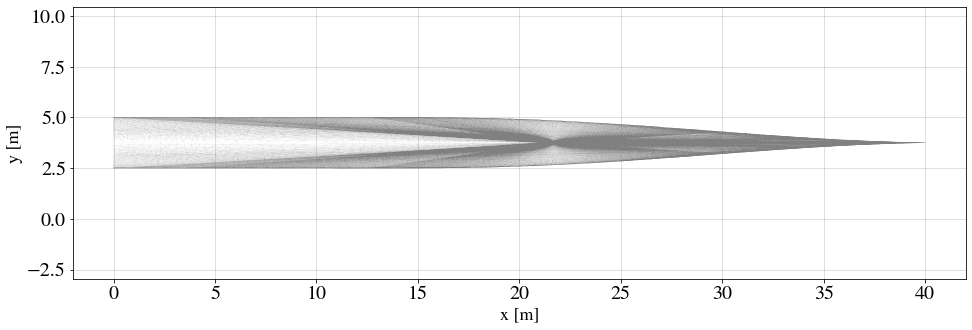

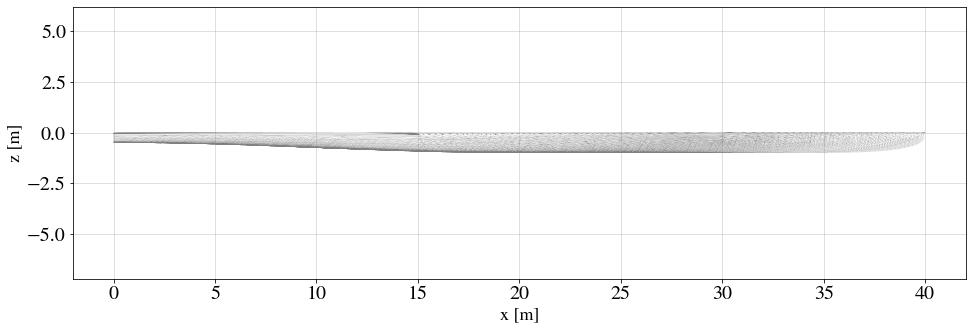

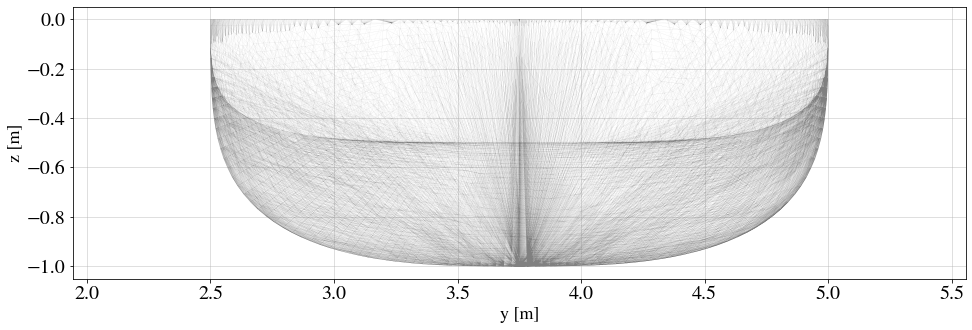

In [6]:
fig, ax = plt.subplots(1, 1, figsize = figure_size)
ax.plot(fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 0], fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 1], color = plot_color, linewidth = line_width)
ax.axis('equal')
ax.set_xlabel('x [m]', fontsize = label_font_size)
ax.set_ylabel('y [m]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)

fig, ax = plt.subplots(1, 1, figsize = figure_size)
ax.plot(fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 0], fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 2], color = plot_color, linewidth = line_width)
ax.axis('equal')
ax.set_xlabel('x [m]', fontsize = label_font_size)
ax.set_ylabel('z [m]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)

fig, ax = plt.subplots(1, 1, figsize = figure_size)
ax.plot(fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 1], fast_ferry_mesh.verts_array[fast_ferry_mesh.faces_array.flatten(), 2], color = plot_color, linewidth = line_width)
ax.axis('equal')
ax.set_xlabel('y [m]', fontsize = label_font_size)
ax.set_ylabel('z [m]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)

## Calculate and print volumetric properties

In [7]:
fast_ferry_mesh.calc_volume_properties()
if fast_ferry_mesh.volume < 0:
    fast_ferry_mesh.reverse_normal_direction()
    fast_ferry_mesh.calc_volume_properties()
print('\n')
print('Volume of modified mesh:                     {:.3f} m^3'.format(fast_ferry_mesh.volume))
print('Volume center of modified mesh (x, y, z):    ({:.3f} m, {:.3f} m, {:.3f} m)'.format(fast_ferry_mesh.volume_center[0], fast_ferry_mesh.volume_center[1], fast_ferry_mesh.volume_center[2]))

Calculating centers, areas and normal vectors of faces.
Finished calculating centers, areas and normal vectors of faces.
Calculating centers, areas and normal vectors of faces.
Finished calculating centers, areas and normal vectors of faces.


Volume of modified mesh:                     52.426 m^3
Volume center of modified mesh (x, y, z):    (16.280 m, 3.750 m, -0.393 m)


## Export modified mesh as wavefront (.obj) file

In [8]:
fast_ferry_mesh.write_obj(export_path)